In [1]:
#importação das bibliotecas/importing the libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('life_expectancy.csv')

In [3]:
df.describe()

,Year,Average Life Expectancy (Years),Age-adjusted Death Rate
count,1044.00000,1035.000000,1044.000000
mean,1957.50000,64.117295,1614.076820
std,33.50112,11.786490,678.013357
min,1900.00000,29.100000,616.700000
25%,1928.75000,56.600000,1040.250000
50%,1957.50000,66.600000,1541.400000
75%,1986.25000,73.600000,2073.025000
max,2015.00000,81.400000,3845.700000


In [4]:
df.shape

(1044, 5)

In [5]:
#verificar a ocorrência de valores nulos / check for the occurrence of null values
df.isnull().sum()

Year                               0
Race                               0
Sex                                0
Average Life Expectancy (Years)    9
Age-adjusted Death Rate            0
dtype: int64

In [104]:
#renomeando as colunas com nomes mais curtos/ renaming columns with shorter names
df.rename(columns={'Average Life Expectancy (Years)':'Life_expectancy','Age-adjusted Death Rate':'Death_rate'}, inplace=True)

In [105]:
df.columns

Index(['Year', 'Race', 'Sex', 'Life_expectancy', 'Death_rate'], dtype='object')

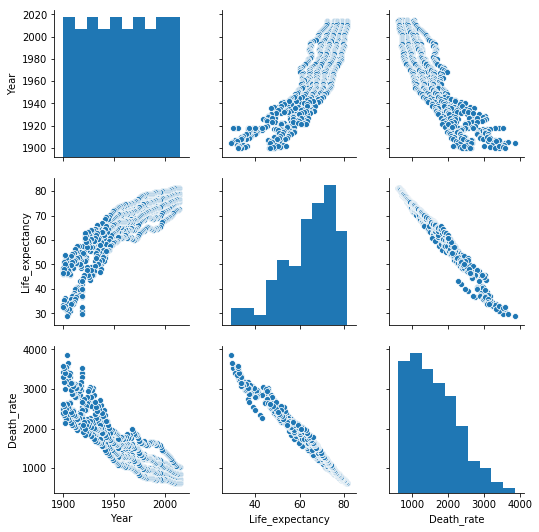

In [106]:
#visualizando a distribuição dos dados/visualizing the data distribution
sns.pairplot (df)

In [107]:
X = df['Year'].values.reshape(-1,1)
y = df['Life_expectancy'].values.reshape(-1,1)

In [108]:
#preencher os valores nulos com a média/fill the null values with the average
df = df.fillna(df.mean()) 
df.isnull().sum()

Year               0
Race               0
Sex                0
Life_expectancy    0
Death_rate         0
dtype: int64

In [109]:
#localizando as colunas de valores dependentes(y) e independentes(x)
#locating the columns of dependent (y) and independent (x) values
x = df.iloc[:,0].values
y = df.iloc[:,3].values

In [110]:
#executando a validação cruzada para o aprendizado do modelo
#performing cross-validation for model learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [118]:
#treinando o algoritmo / training the algorithm
regr = LinearRegression()  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# y = b0 + b1*x

In [112]:
#valor de b0(ponto de interceptação da linha de treinamento)
print(regressor.intercept_)
#valor de b1(declive da linha que afeta diretamente  a variável dependente 'Life_expectancy')
print(regressor.coef_)
#linear regression form

-516.4099324452861
[0.29661322]


In [113]:
y_pred = regr.predict(X_test)

In [121]:
#ver os valores atuais e os valores previstos/see current values and predicted values
df = pd.DataFrame({'Val_atuais': y_test.flatten(), 'Val_previstos': y_pred.flatten()}).head()
df

,Val_atuais,Val_previstos
0,74.3,76.816516
1,57.2,55.756977
2,66.8,60.502789
3,65.0,57.536656
4,39.1,52.494231


In [115]:
#encontrando os erros  MSE e MAE / Finding Mean Absolute Error and Mean Squared Error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.4506489148600465
Mean Squared Error: 33.686315364260096
Root Mean Squared Error: 5.8039913304776825


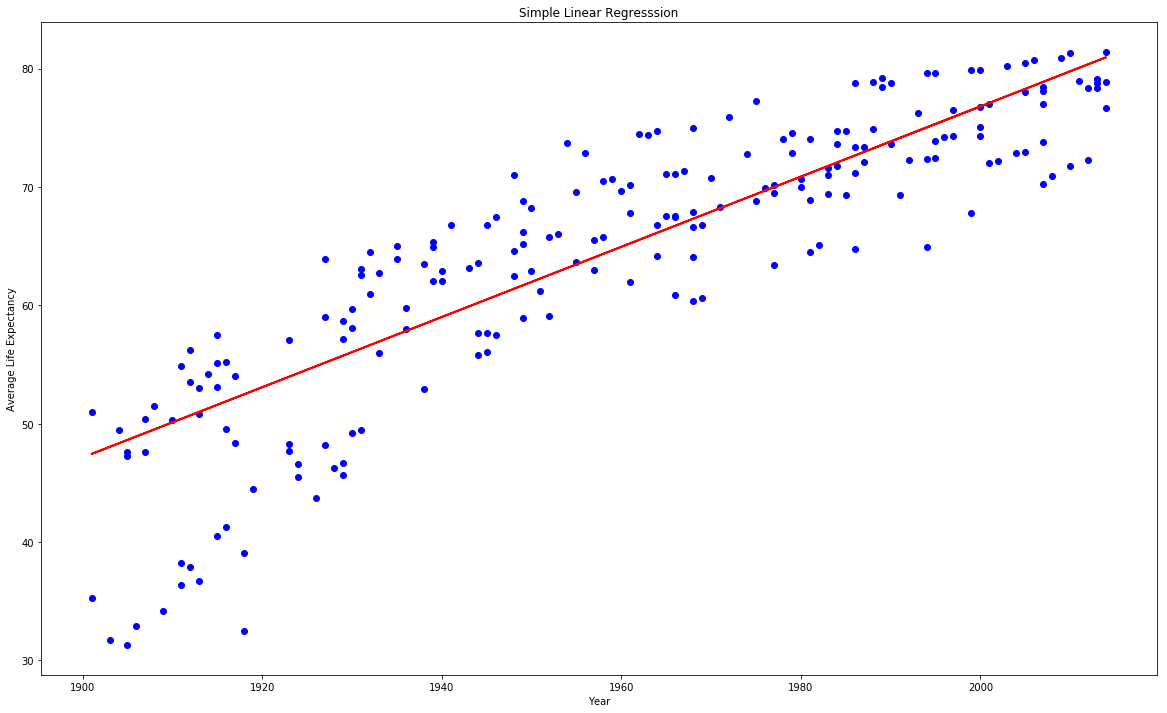

In [120]:
#visualização do gráfico / graph view
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Simple Linear Regresssion')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.rcParams['figure.figsize']=(20,12)

In [117]:
#fazendo previsão da expectativa de vida no ano de 2050 = 91 anos
#forecasting life expectancy in the year 2050 = 91 years
prev1 = regr.intercept_ + regr.coef_* 2050
prev1

array([91.64717704])